In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Assignment 4

/content/gdrive/My Drive/Assignment 4


In [ ]:
import gensim
import pandas as pd
import csv
from gensim.parsing.preprocessing import STOPWORDS
import re
from gensim import models
import matplotlib.pyplot as plt
csv.field_size_limit(1000000000)

1000000000

In [ ]:
df = pd.read_csv("ap.csv",names = ['article_num','article'])

In [ ]:
df.dropna(inplace = True)

In [ ]:
text_data = df.values[:,1]

In [ ]:
result = []
str_type = type(text_data[0])
for text in text_data:
    text = text.replace('\n',' ')
    text = text.replace('! ',' ')
    text = text.replace(', ',' ')
    text = text.replace('-',' ')
    text = text.replace('.',' ')
    text = text.replace('``',' ')
    re.sub('[^A-Za-z]+', '',text)
    tmp = text.split(' ')
    t2 = []
    for words in tmp:
        words = words.lower()
        t2.append(words)
    result.append(t2)

In [ ]:
f = open('stopwords-en.txt','r')
stopwords = set()
for words in f:
    stopwords.add(words)
stopwords.add("said")
stopwords.add("government")
stopwords.add('states')
stopwords.add('great')
stopwords.add('united')
stopwords.add('work')
stopwords.add('public')
stopwords.add('Union')
stopwords.add('Address')
stopwords.add('america')
stopwords.add('let\'s')
stopwords.add('it\'s')
u = 'that\'s'
stopwords.add(u)
f.close()

In [ ]:
processed_data = [[token for token in text if (len(token)>3 and token not in STOPWORDS and token not in stopwords)] for text in result]

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_data)
print(dictionary)

Dictionary(42719 unique tokens: ['12th', 'adding', 'adult', 'alcohol', 'allegedly']...)


In [ ]:
bow = [dictionary.doc2bow(text) for text in processed_data]

In [ ]:
def lda_coherence(corpus,dictionary,bow):
    x = []
    y = []
    for k in range(20,150,5):
        lda_model = models.LdaModel(bow,id2word = dictionary,num_topics = k)
        coherence_model = models.CoherenceModel(lda_model,texts = corpus,dictionary = dictionary)
        cv = coherence_model.get_coherence()
        x.append(k)
        y.append(cv)
    plt.plot(x,y)
    plt.xlabel("Number of Topics")
    plt.ylabel("Topic coherence")
    plt.title("LDA Model")
    plt.show()

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


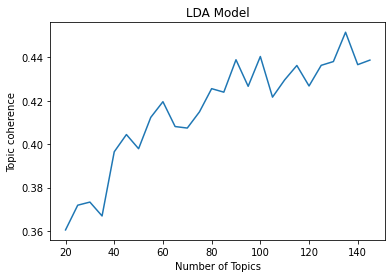

In [ ]:
lda_coherence(processed_data,dictionary,bow)

In [ ]:
lda_model = models.LdaModel(bow,id2word = dictionary,num_topics = 45)

In [ ]:
lda_model.show_topics(num_topics = 45)

[(0,
  '0.024*"percent" + 0.007*"year" + 0.004*"economy" + 0.004*"economic" + 0.004*"billion" + 0.003*"business" + 0.003*"japan" + 0.003*"years" + 0.003*"today" + 0.003*"increase"'),
 (1,
  '0.009*"rights" + 0.007*"police" + 0.006*"human" + 0.004*"group" + 0.004*"president" + 0.003*"thursday" + 0.003*"told" + 0.003*"state" + 0.003*"people" + 0.003*"military"'),
 (2,
  '0.009*"gunter" + 0.005*"ives" + 0.005*"bail" + 0.005*"ranch" + 0.005*"nosair" + 0.004*"kahane" + 0.004*"police" + 0.004*"court" + 0.003*"state" + 0.003*"people"'),
 (3,
  '0.007*"year" + 0.006*"aids" + 0.005*"people" + 0.004*"percent" + 0.004*"study" + 0.004*"national" + 0.004*"infected" + 0.003*"immune" + 0.003*"dukakis" + 0.003*"virus"'),
 (4,
  '0.021*"late" + 0.019*"dollar" + 0.015*"london" + 0.014*"gold" + 0.012*"nordstrom" + 0.011*"ounce" + 0.007*"price" + 0.007*"troy" + 0.007*"francs" + 0.006*"compared"'),
 (5,
  '0.006*"state" + 0.004*"people" + 0.004*"soviet" + 0.003*"years" + 0.003*"year" + 0.003*"time" + 0.003